## Content / İçerik

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Data Transformation](#3.2)  
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Building Hierarchy Graph/ Dendogramg](#4.1)
    * [5.2. Steps for Hierarchial Risk Parity](#4.2)
* [6.Backtesting-Out Of Sample ](#5)  

##### ------------------------------------------------------------------------------------------------------


* [1. Problem Tanımı](#0)
* [2. Başlarken - Kitaplıkları ve Veri Kümesini Yükleyin](#1)
    * [2.1. Kitaplıkları Yükle](#1.1)
    * [2.2. Veri Kümesini Yükle](#1.2)
* [3. Keşif Veri Analizi](#2)
    * [3.1 Tanımlayıcı İstatistikler](#2.1)
    * [3.2. Veri Görselleştirme](#2.2)
* [4. Veri Hazırlama](#3)
    * [4.1 Veri Temizleme](#3.1)
    * [4.3.Veri Dönüştürme](#3.2)
* [5.Algoritmaları ve Modelleri Değerlendirin](#4)
    * [5.1. Hiyerarşi Grafiği/ Dendogram Oluşturma](#4.1)
    * [5.2. Hiyerarşik Risk Paritesi Adımları](#4.2)
* [6.Numunenin Geri Testi](#5)

<a id='0'></a>
# 1. Problem Definition / Problem tanımı

Our goal in this case study is to maximize risk-adjusted returns using a clustering
reduction-based algorithm on a dataset of stocks to allocate capital into different asset
classes. 

#### -----------------------------------------------------------------------------

Bu örnek olay incelemesindeki amacımız, bir kümeleme kullanarak riske göre ayarlanmış getirileri maksimize etmektir.
sermayeyi farklı varlığa tahsis etmek için bir hisse senedi veri kümesinde indirgeme tabanlı algoritma
sınıflar.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages / Başlarken - Verileri ve python paketlerini yükleme

<a id='1.1'></a>
## 2.1. Loading the python packages

Checking is the additional packages needed are present, if not install them. Let us chek is the cvxopt package is present, if not install it. This package is checked separately as it is not included in requirement.txt of this book repository as the package is not used across any other case study of thie book.

In [1]:
import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
if 'cvxopt' not in installedPackages :
    !pip install cvxopt==1.2.5

In [2]:
!pip install cvxopt


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import date

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


#Package for optimization of mean variance optimization
#Ortalama varyans optimizasyonunun optimizasyonu için paket
import cvxopt as opt
from cvxopt import blas, solvers


<a id='1.2'></a>
## 2.2. Loading the Data / Verileri Yükleme

In [4]:
dataset = read_csv('SP500Data.csv',index_col=0)

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Exploratory Data Analysis / Keşifsel Veri Analizi

<a id='2.1'></a>
## 3.1. Descriptive Statistics / Tanımlayıcı istatistikler

In [7]:
dataset.shape

(448, 502)

In [8]:
set_option('display.width', 100)
dataset.head(5)

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,58.790001,98.410004,192.490005,153.839996,64.309998,177.699997,10.98,106.089996,10.88,203.039993,...,146.990005,164.300003,47.810001,29.370001,67.879997,68.070000,81.599998,124.059998,50.700001,71.769997
2018-01-03,58.919998,99.949997,195.820007,154.550003,65.309998,181.039993,11.55,107.050003,10.87,202.119995,...,149.740005,162.520004,47.490002,29.330000,69.239998,68.900002,81.529999,124.919998,50.639999,72.099998
2018-01-04,58.820000,99.379997,199.250000,156.380005,64.660004,183.220001,12.12,111.000000,10.83,198.539993,...,151.259995,163.399994,47.119999,29.690001,70.489998,69.360001,82.360001,124.739998,50.849998,72.529999
2018-01-05,58.990002,101.110001,202.320007,157.669998,66.370003,185.339996,11.88,112.180000,10.87,199.470001,...,152.229996,164.490005,46.790001,29.910000,74.150002,69.230003,82.839996,125.980003,50.869999,73.360001
2018-01-08,58.820000,99.489998,207.800003,158.929993,66.629997,185.039993,12.28,111.389999,10.87,200.529999,...,151.410004,162.300003,47.139999,30.260000,74.639999,69.480003,82.980003,126.220001,50.619999,74.239998


<a id='2.2'></a>
## 3.2. Data Visualization / Veri Görselleştirme

We will look at the data visualisation in the later sections.

Veri görselleştirmesine sonraki bölümlerde bakacağız.

<a id='3'></a>
## 4. Data Preparation / Veri Hazırlama

<a id='3.1'></a>
## 4.1. Data Cleaning / Veri Temizleme
We check for the NAs in the rows, either drop them or fill them with the mean of the column.

Satırlardaki NA'ları kontrol ediyoruz, ya bırakıyoruz ya da sütunun ortalamasıyla dolduruyoruz.

In [9]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())
dataset.shape

Null Values = True


(448, 502)

Getting rid of the columns with more than 30% missing values. 

%30'dan fazla eksik değer içeren sütunlardan kurtulmak.

In [10]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(448, 498)

Given that there are null values drop the rown contianing the null values.

Boş değerlerin olduğu göz önüne alındığında, boş değerleri içeren sırayı bırakın.

In [11]:
# Fill the missing values with the last value available in the dataset. 
# Eksik değerleri veri kümesinde bulunan son değerle doldurun.
dataset=dataset.fillna(method='ffill')
dataset.head(2)

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,58.790001,98.410004,192.490005,153.839996,64.309998,177.699997,10.98,106.089996,10.88,203.039993,...,146.990005,164.300003,47.810001,29.370001,67.879997,68.070000,81.599998,124.059998,50.700001,71.769997
2018-01-03,58.919998,99.949997,195.820007,154.550003,65.309998,181.039993,11.55,107.050003,10.87,202.119995,...,149.740005,162.520004,47.490002,29.330000,69.239998,68.900002,81.529999,124.919998,50.639999,72.099998


<a id='3.2'></a>
## 4.2. Data Transformation / Veri Dönüşümü

For the purpose of clustering, we will be using annual
returns. Additionally, we will train the data followed by testing. Let us prepare the
dataset for training and testing, by separating 20% of the dataset for testing followed
by generating the return series.

#### ------------------------------------- 

Kümeleme amacıyla, yıllık kullanacağız
İadeler. Ek olarak, verileri test ettikten sonra eğiteceğiz. hazırlayalım
takip edilen test için veri setinin %20'sini ayırarak eğitim ve test için veri seti
dönüş serisini oluşturarak.

In [12]:
X= dataset.copy('deep')
row= len(X)
train_len = int(row*.8)

In [13]:
X_train = X.head(train_len)
X_test = X.tail(row-train_len)

In [14]:
returns = X_train.pct_change().dropna()
returns_test=X_test.pct_change().dropna()

The parameters to clusters are the indices and the variables used in the clustering are the columns. Hence the data is in the right format to be fed to the clustering algorithms

Kümelerin parametreleri indekslerdir ve kümelemede kullanılan değişkenler sütunlardır. Dolayısıyla veriler, kümeleme algoritmalarına beslenmek için doğru formattadır.

<a id='4'></a>
# 5. Evaluate Algorithms and Models / Algoritmaları ve Modelleri Değerlendirin

<a id='4.1'></a>
## 5.1. Building Hierarchy Graph/Hiyerarşi Grafiği Oluşturma

The first step is to look for clusters of corre‐
lations using the agglomerate hierarchical clustering technique. The hierarchy class
has a dendrogram method which takes the value returned by the linkage method of
the same class.

Linkage does the actual clustering in one line of code, and returns a list of the clusters joined in the format: Z=[stock_1, stock_2, distance, sample_count]

#### -----------------------------------------------

İlk adım, ilişki kümelerini aramaktır.
Aglomerat hiyerarşik kümeleme tekniğini kullanan ilişkiler. Hiyerarşi sınıfı
bağlantı yöntemi tarafından döndürülen değeri alan bir dendrogram yöntemine sahiptir.
aynı sınıf.

Bağlantı, gerçek kümelemeyi tek bir kod satırında yapar ve şu biçimde birleştirilmiş kümelerin bir listesini döndürür: Z=[stok_1, stok_2, mesafe, numune_sayım]

#### Compute Correlation / Hesaplama Korelasyonu

In [15]:
def correlDist(corr):
    # A distance matrix based on correlation, where 0<=d[i,j]<=1
    # This is a proper distance metric
    dist = ((1 - corr) / 2.)**.5  # distance matrix
    return dist

In [16]:
#Calulate linkage
dist = correlDist(returns.corr())
link = linkage(dist, 'ward')
link[0]

array([24.        , 25.        ,  0.09110116,  2.        ])

Computation of linkages is followed by
the visualization of the clusters through a dendrogram, which displays a cluster tree.
The leaves are the individual stocks and the root is the final single cluster. The “distance” between each cluster is shown on the y-axis, and thus the longer the branches
are, the less correlated two clusters are.

#### ------------------------------------------------------

Bağlantıların hesaplanması takip eder
küme ağacını görüntüleyen bir dendrogram yoluyla kümelerin görselleştirilmesi.
Yapraklar bireysel stoklardır ve kök son tek kümedir. Her küme arasındaki "mesafe" y ekseninde gösterilir ve bu nedenle dallar ne kadar uzunsa
iki küme daha az ilişkilidir.

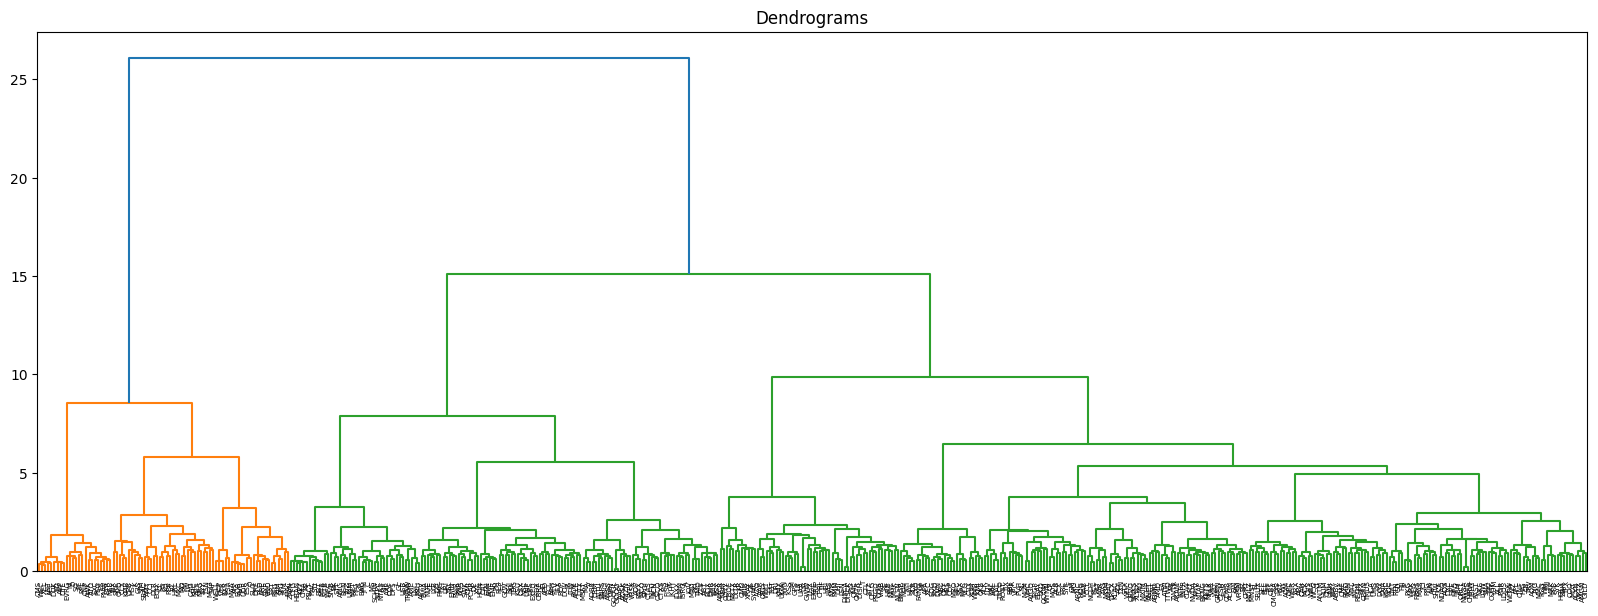

In [17]:
#Plot Dendogram
plt.figure(figsize=(20, 7))
plt.title("Dendrograms")
dendrogram(link,labels = X.columns)
plt.show()

<a id='4.2'></a>
## 5.2 Steps for Hierarchial Risk Parity / Hiyerarşik Risk Eşliği için Adımlar

#### Quasi-diagonalization and getting the weights for Hierarchial Risk Parity
#### Yarı köşegenleştirme ve Hiyerarşik Risk Paritesi için ağırlıkları alma

A 'quasi-diagonalization' is a process usually known as matrix seriation and which can be performed using hierarchical clustering.
This process reorganize the covariance matrix so similar investments will be placed together. This matrix diagonalization allow us to distribute weights optimally following an inverse-variance allocation.

#### ---------------------------------

Bir 'yarı-köşegenleştirme', genellikle matris serileştirme olarak bilinen ve hiyerarşik kümeleme kullanılarak gerçekleştirilebilen bir işlemdir.
Bu süreç kovaryans matrisini yeniden düzenler, böylece benzer yatırımlar bir araya getirilir. Bu matris köşegenleştirmesi, ters varyans tahsisini takiben ağırlıkları en uygun şekilde dağıtmamızı sağlar.

In [18]:
def getQuasiDiag(link):
    # Sort clustered items by distance
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  
        df0 = sortIx[sortIx >= numItems]  
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]  
        df0 = pd.Series(link[j, 1], index=i + 1)
        sortIx = sortIx.append(df0)  
        sortIx = sortIx.sort_index()  
        sortIx.index = range(sortIx.shape[0])  
    return sortIx.tolist()

#### Recursive bisection / özyinelemeli ikiye bölme

 This step distributes the allocation through recursive bisection based on cluster covariance.

 Bu adım, ayırmayı küme kovaryansına dayalı özyinelemeli ikiye bölme yoluyla dağıtır.

In [19]:
def getClusterVar(cov,cItems):
    # Compute variance per cluster
    # Küme başına hesaplama varyansı
    cov_=cov.loc[cItems,cItems] 
    w_=getIVP(cov_).reshape(-1,1)
    cVar=np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cVar



def getRecBipart(cov, sortIx):
    # Compute HRP alloc
    # HRP tahsisini hesapla
    w = pd.Series(1, index=sortIx)
    cItems = [sortIx]  # initialize all items in one cluster / tüm öğeleri tek bir kümede başlat
    while len(cItems) > 0:
        cItems = [i[j:k] for i in cItems for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1]  # bi-section
        for i in range(0, len(cItems), 2):  
            cItems0 = cItems[i]  
            cItems1 = cItems[i + 1]  
            cVar0 = getClusterVar(cov, cItems0)
            cVar1 = getClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha  
            w[cItems1] *= 1 - alpha  
    return w

#### Comparison against other asset allocation methods:.
#### Diğer varlık tahsis yöntemleriyle karşılaştırma:.

The main premise of this case study
was to develop an alternative to Markowitz’s Minimum-Variance Portfolio based
asset allocation. So, in this step, we define a functions to compare the performance of the following asset allocation methods.4

Bu vaka çalışmasının ana dayanağı
Markowitz'in Minimum Varyans Portföyüne bir alternatif geliştirmekti.
varlık tahsisi. Bu nedenle, bu adımda, aşağıdaki varlık tahsis yöntemlerinin performansını karşılaştırmak için bir işlev tanımlıyoruz.

    1. MVP - Markowitz’s Minimum-Variance Portfolio
    2. HRP - Hierarchial Risk Parity

In [20]:
def getMVP(cov):

    cov = cov.T.values
    n = len(cov)
    N = 100
    mus = [10 ** (5.0 * t / N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    # cvxopt matrislerine dönüştür
    S = opt.matrix(cov)
    #pbar = opt.matrix(np.mean(returns, axis=1))
    pbar = opt.matrix(np.ones(cov.shape[0]))

    # Create constraint matrices
    # Kısıtlama matrisleri oluştur
    G = -opt.matrix(np.eye(n))  # negative n x n identity matrix / negatif n x n birim matris
    h = opt.matrix(0.0, (n, 1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    
    # Calculate efficient frontier weights using quadratic programming
    # İkinci dereceden programlamayı kullanarak verimli sınır ağırlıklarını hesaplayın
    solvers.options['show_progress'] = False
    portfolios = [solvers.qp(mu * S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER    
    ## FRONTIER İÇİN RİSKLERİ VE GERİLERİ HESAPLAYIN
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S * x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    ## FENER EĞRİSİNİN 2. DERECE POLİNOMİ HESAPLAYIN
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO    
    # OPTİMAL PORTFÖYÜ HESAPLAYIN
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']

    return list(wt)

def getIVP(cov, **kargs):
    # Compute the inverse-variance portfolio
    # Ters varyans portföyünü hesapla
    ivp = 1. / np.diag(cov)
    ivp /= ivp.sum()
    return ivp

def getHRP(cov, corr):
    # Construct a hierarchical portfolio
    # Hiyerarşik bir portföy oluşturun
    dist = correlDist(corr)
    link = sch.linkage(dist, 'single')
    #plt.figure(figsize=(20, 10))
    #dn = sch.dendrogram(link, labels=cov.index.values)
    #plt.show()
    sortIx = getQuasiDiag(link)
    sortIx = corr.index[sortIx].tolist()
    hrp = getRecBipart(cov, sortIx)
    return hrp.sort_index()

#### Step 4:  Getting the portfolio weights for all types of asset allocation
#### 4. Adım: Her türlü varlık tahsisi için portföy ağırlıklarını alma

In [21]:
def get_all_portfolios(returns):
    
    cov, corr = returns.cov(), returns.corr()
    hrp = getHRP(cov, corr)
    mvp = getMVP(cov)
    mvp = pd.Series(mvp, index=cov.index)
    portfolios = pd.DataFrame([mvp, hrp], index=['MVP', 'HRP']).T
    #portfolios = pd.DataFrame([ivp, hrp], index=['IVP', 'HRP']).T
    return portfolios

In [22]:
portfolios = get_all_portfolios(returns)

Text(0.5, 1.0, 'HRP')

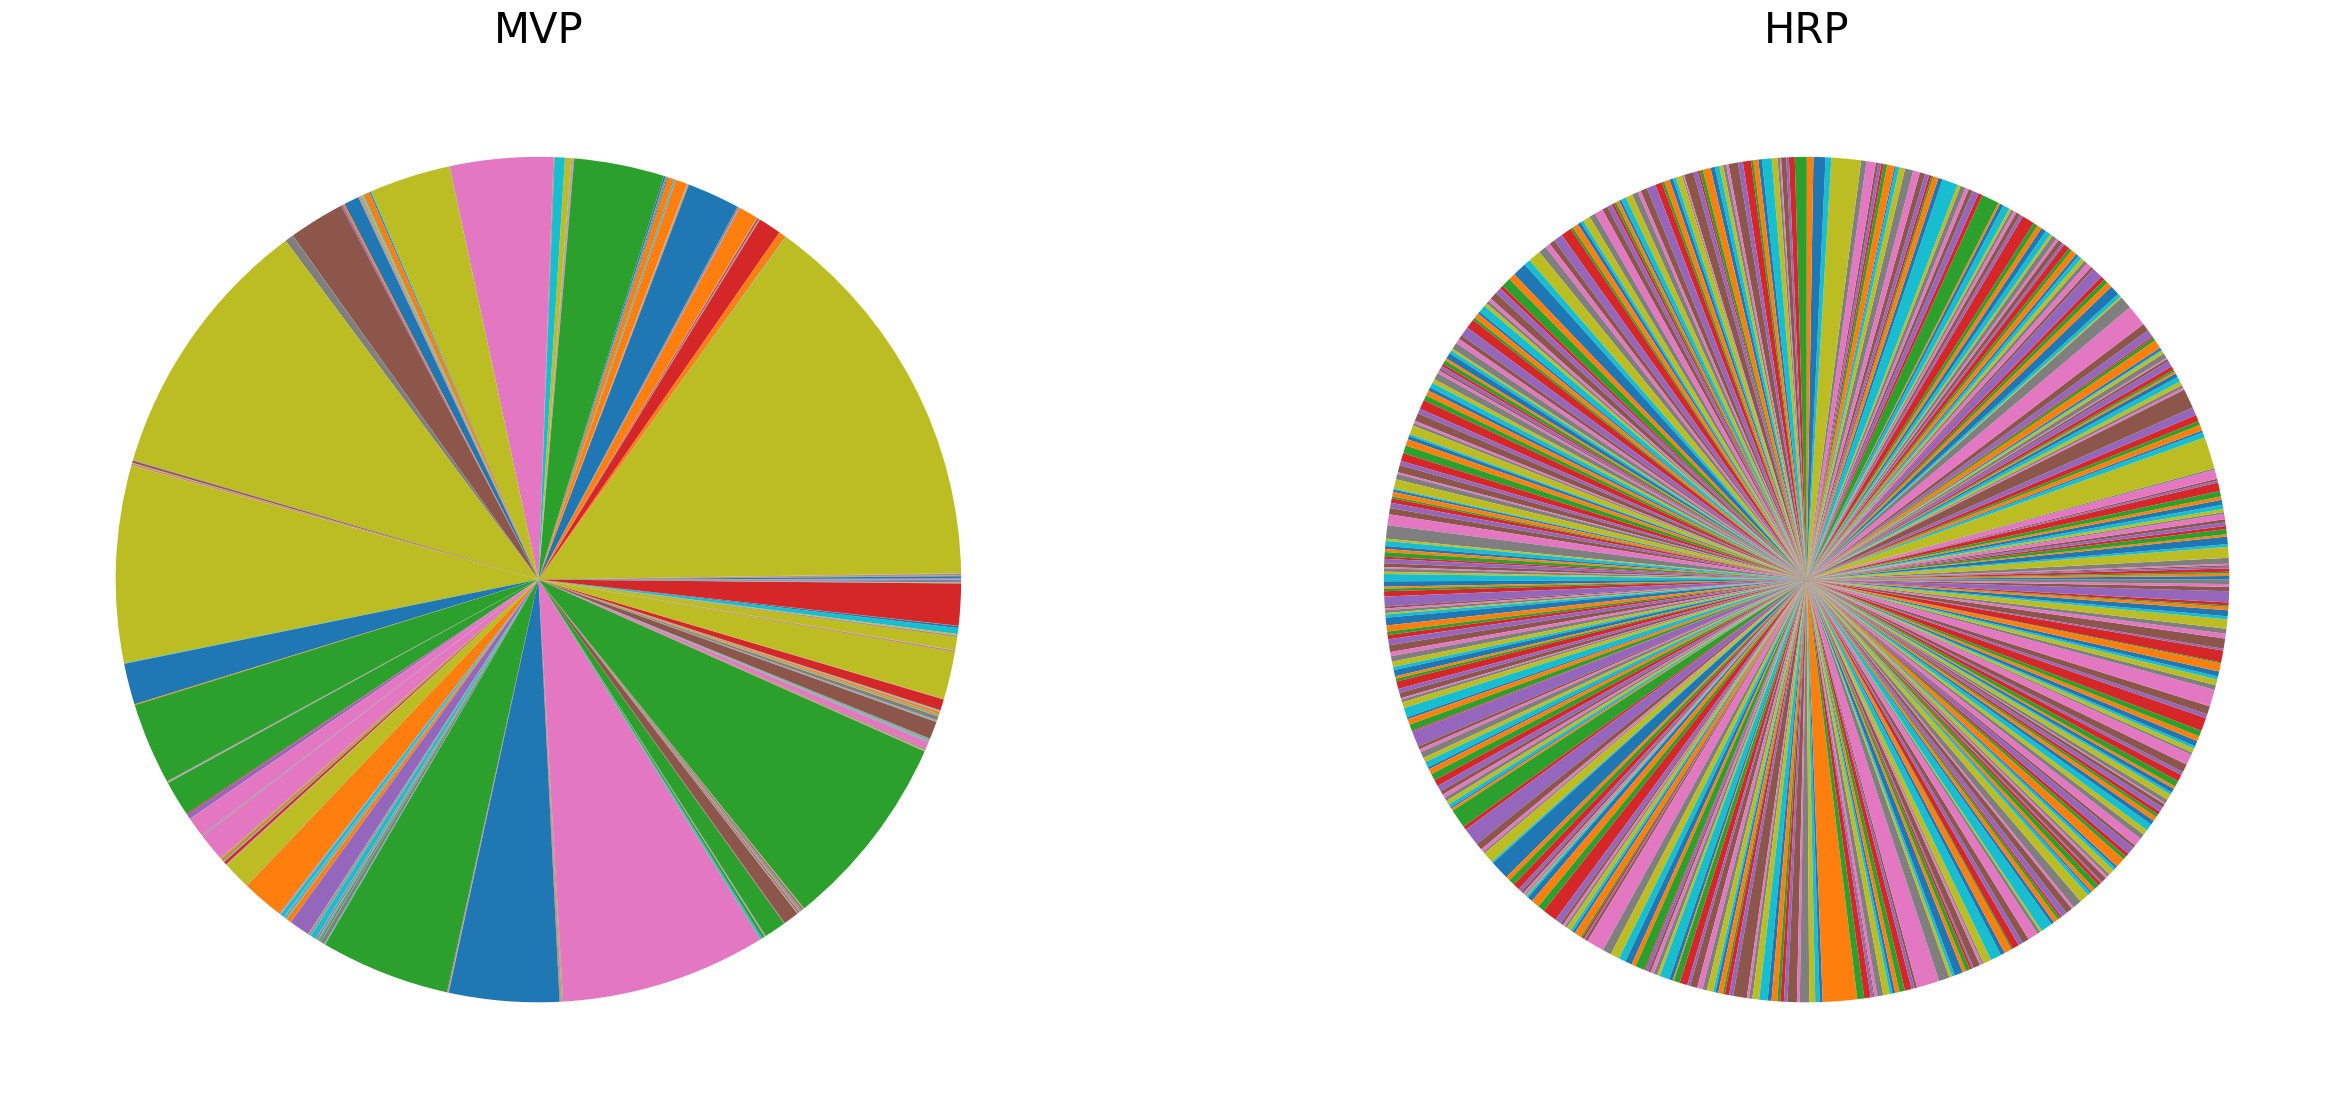

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,20))
ax1.pie(portfolios.iloc[:,0], );
ax1.set_title('MVP',fontsize = 30)
ax2.pie(portfolios.iloc[:,1]);
ax2.set_title('HRP',fontsize = 30)
#portfolios.plot.pie(subplots=True, figsize=(20, 10),legend = False);

The first pie chart shown the asset allocation of MVP, followed by IVP and HRP. We clearly see more diversification in HRP as compared to MVP. On the
other hand, IVP evenly spreads weights through all assets, and it looks similar to
HRP. However, this method ignores the correlation structure between the instruments unlike HRP is included just for comparison purpose. Let us look at the backtesting results.

#### -----------------------------------------------------------------

İlk pasta grafik, MVP'nin varlık tahsisini, ardından IVP ve HRP'yi gösteriyordu. MVP'ye kıyasla HRP'de daha fazla çeşitlilik olduğunu açıkça görüyoruz. Üzerinde
Öte yandan, IVP, ağırlıkları tüm varlıklara eşit olarak dağıtır ve şuna benzer:
HRP. Ancak bu yöntem, HRP'nin sadece karşılaştırma amacıyla dahil edilmesinden farklı olarak enstrümanlar arasındaki korelasyon yapısını göz ardı eder. Geriye dönük test sonuçlarına bakalım.

<a id='5'></a>
# 6. Backtesting-Out Of Sample/Geriye Dönük Test-Numune Dışı

In [24]:
Insample_Result=pd.DataFrame(np.dot(returns,np.array(portfolios)), \
                             columns=['MVP', 'HRP'], index = returns.index)
OutOfSample_Result=pd.DataFrame(np.dot(returns_test,np.array(portfolios)), \
                                columns=['MVP', 'HRP'], index = returns_test.index)

<Axes: title={'center': 'Out Of Sample Results/Numune Sonuçları Dışında'}, xlabel='Date'>

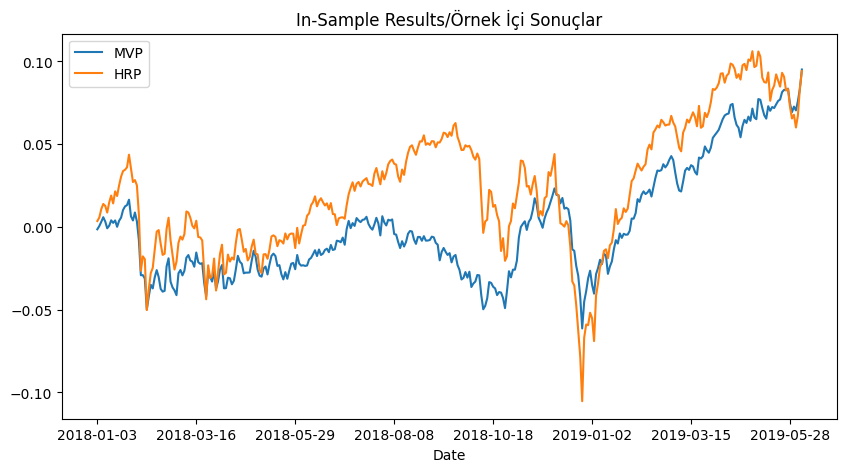

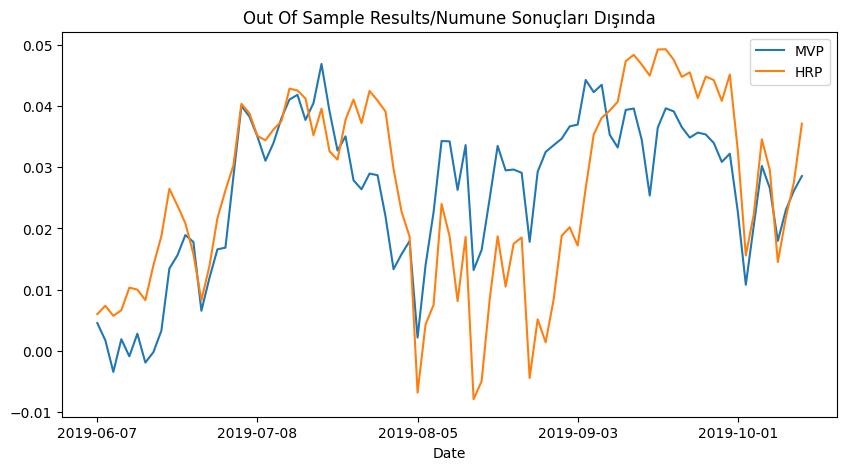

In [28]:
Insample_Result.cumsum().plot(figsize=(10, 5), title ="In-Sample Results/Örnek İçi Sonuçlar")
OutOfSample_Result.cumsum().plot(figsize=(10, 5), title ="Out Of Sample Results/Numune Sonuçları Dışında")

### In Sample and Out of Sample Results / Numune İçi ve Numune Dışı Sonuçlar

In [26]:
stddev = Insample_Result.std() * np.sqrt(252)
sharp_ratio = (Insample_Result.mean()*np.sqrt(252))/(Insample_Result).std()
Results = pd.DataFrame(dict(stdev=stddev, sharp_ratio = sharp_ratio))
Results

,stdev,sharp_ratio
MVP,0.085516,0.785019
HRP,0.126944,0.523599


In [27]:
stddev_oos = OutOfSample_Result.std() * np.sqrt(252)
sharp_ratio_oos = (OutOfSample_Result.mean()*np.sqrt(252))/(OutOfSample_Result).std()
Results_oos = pd.DataFrame(dict(stdev_oos=stddev_oos, sharp_ratio_oos = sharp_ratio_oos))
Results_oos

,stdev_oos,sharp_ratio_oos
MVP,0.102761,0.786621
HRP,0.125610,0.836159


Although the in-sample result of MVP look promising, the out of sample sharp ratio
and overall return of portfolio constructed using hierarchical clustering approach are
better. The diversification that HRP achieves across uncorrelated assets makes the
methodology more robust against shocks


#### --------------------------------------------------


MVP'nin numune içi sonucu umut verici görünse de, numune dışı keskinlik oranı
ve hiyerarşik kümeleme yaklaşımı kullanılarak oluşturulan portföyün genel getirisi
daha iyi. HRP'nin ilişkisiz varlıklar arasında elde ettiği çeşitlendirme,
Şoklara karşı daha dayanıklı metodoloji

**Conclusion**

Markowitz’s minimum-variance based portfolio allocation is less diverse and is concentrated in a few stocks. In the hierarchical clustering-based allocation, the allocation is more diverse and distributed across many assets. These portfolios then offer better tail risk management.

Finally, we looked at the backtesting framework, which enables us to compute and
analyze the in-sample and out of sample return and sharpe ratio of each hypothetical
portfolio. This helps in determining the best performer out of all the portfolio allocation methods. The hierarchical clustering approaches yielded the best out-of-sample
results.

#### ------------------------------------------------------------------------

**Çözüm**

Markowitz'in minimum varyansa dayalı portföy dağılımı daha az çeşitlidir ve birkaç hisse senedinde yoğunlaşmıştır. Hiyerarşik kümelemeye dayalı tahsiste, tahsis daha çeşitlidir ve birçok varlığa dağıtılır. Bu portföyler daha sonra daha iyi kuyruk risk yönetimi sunar.

Son olarak, hesaplama yapmamızı sağlayan geriye dönük test çerçevesine baktık ve
her varsayımsalın numune içi ve numune dışı getirisini ve keskin oranını analiz edin
portföy. Bu, tüm portföy tahsisi yöntemlerinden en iyi performansı gösterenin belirlenmesine yardımcı olur. Hiyerarşik kümeleme yaklaşımları en iyi örneklem dışı sonuçları verdi
sonuçlar.